**Identifying Outliers**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from scipy.stats import zscore
import seaborn as sns

In [8]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [9]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [11]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


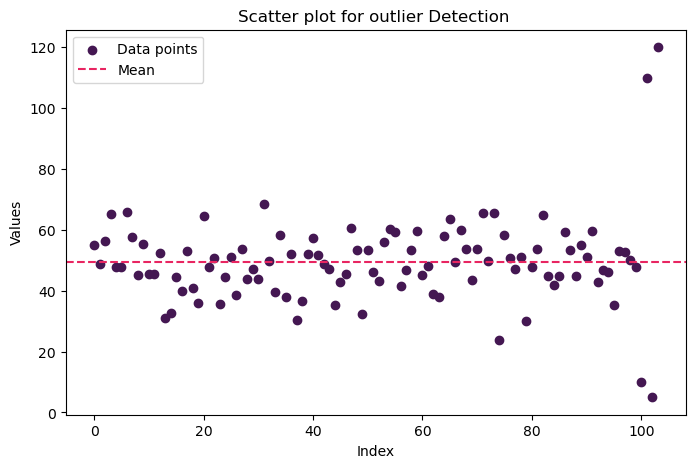

In [25]:
#Scatter
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='#441752',label='Data points')
plt.axhline(y=df['Values'].mean(),color="#E82561",linestyle="--",label="Mean")
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outlier Detection ")
plt.legend()
plt.show()

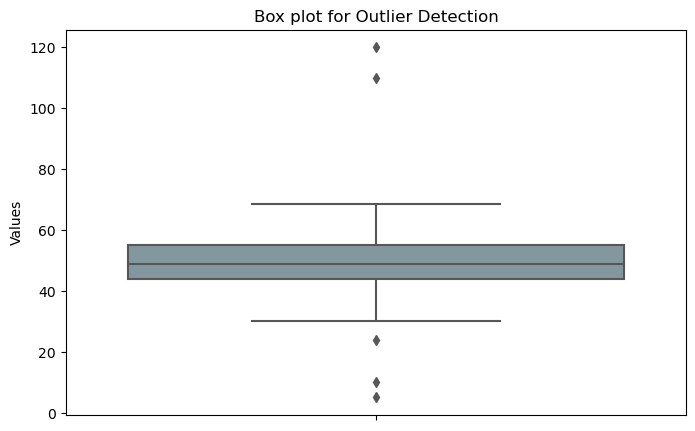

In [29]:
#box
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y="Values",color='#7E99A3')
plt.title("Box plot for Outlier Detection")
plt.show()

In [37]:
#By Z-scores
df['Z-score']=zscore(df['Values'])
df['Outliers_Z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x) >3 else 'Normal')
df[df['Outliers_Z']=='Outlier']

,Values,Z-score,Outliers_Z
101,110.0,4.328173,Outlier
102,5.0,-3.175368,Outlier
103,120.0,5.042796,Outlier


In [39]:
#BY IQR
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)

# Calculating the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Values'] < lower_bound) | (df['Values'] > upper_bound)]

outliers


,Values,Z-score,Outliers_Z
74,23.802549,-1.831694,Normal
100,10.000000,-2.818056,Normal
101,110.000000,4.328173,Outlier
102,5.000000,-3.175368,Outlier
103,120.000000,5.042796,Outlier


In [44]:
#5-Number Summary
import numpy as np

# Step 1: Create a dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution (mean=50, std=10)
outliers = np.array([10, 110, 5, 120])  # Extreme values (outliers)
data = np.concatenate([data, outliers])  # Merge normal data with outliers

# Step 2: Compute the 5-number summary
Q1 = np.percentile(data, 25)  # First Quartile (25th percentile)
Q2 = np.median(data)          # Median (50th percentile)
Q3 = np.percentile(data, 75)  # Third Quartile (75th percentile)
min_value = np.min(data)      # Minimum
max_value = np.max(data)      # Maximum

# Step 3: Compute IQR
IQR = Q3 - Q1

# Step 4: Compute Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Find Outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Step 6: Print Results
print(f"5-Number Summary:\nMin: {min_value}, Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")


5-Number Summary:
Min: 5.0, Q1: 43.874401021766715, Median (Q2): 48.73043708220287, Q3: 55.00852473036764, Max: 120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers: [ 23.80254896  10.         110.           5.         120.        ]


In [51]:
import pandas as pd
from sklearn.utils import resample

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['High', 'Low', 'High', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low']
})


In [52]:
# Separate majority and minority classes
df_high = df[df['Class'] == 'High']
df_low = df[df['Class'] == 'Low']

In [53]:
# Downsample majority class
df_high_downsampled = resample(df_high, replace=False, n_samples=len(df_low), random_state=42)

In [54]:
# Combine downsampled majority class with minority class
df_balanced = pd.concat([df_high_downsampled, df_low])

In [55]:
print(df_balanced['Class'].value_counts())


Class
High    6
Low     6
Name: count, dtype: int64


In [59]:
df_high

,Age,Income,Class
0,22,2000,High
2,27,2700,High
4,30,3500,High
5,35,3800,High
6,40,4000,High
8,50,4300,High
10,60,5000,High


In [86]:
df_high_downsampled

,Age,Income,Class
0,22,2000,High
2,27,2700,High
8,50,4300,High
4,30,3500,High
6,40,4000,High
5,35,3800,High


In [60]:
df_low 

,Age,Income,Class
1,25,2500,Low
3,28,3200,Low
7,45,4200,Low
9,55,4500,Low
11,65,5500,Low
12,70,6000,Low


In [61]:
df_balanced 

,Age,Income,Class
0,22,2000,High
2,27,2700,High
8,50,4300,High
4,30,3500,High
6,40,4000,High
5,35,3800,High
1,25,2500,Low
3,28,3200,Low
7,45,4200,Low
9,55,4500,Low


In [ ]:
#UpSampling

In [71]:
import pandas as pd
from sklearn.utils import resample

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['Minority', 'Majority', 'Majority', 'Majority', 'Majority', 'Minority', 
              'Minority', 'Minority', 'Majority', 'Majority', 'Majority', 'Majority', 'Majority']
})

df[df['Class'] == 'Majority']

,Age,Income,Class
1,25,2500,Majority
2,27,2700,Majority
3,28,3200,Majority
4,30,3500,Majority
8,50,4300,Majority
9,55,4500,Majority
10,60,5000,Majority
11,65,5500,Majority
12,70,6000,Majority


In [72]:
df[df['Class'] == 'Minority']

,Age,Income,Class
0,22,2000,Minority
5,35,3800,Minority
6,40,4000,Minority
7,45,4200,Minority


In [79]:
# Separate majority and minority classes
df_majority = df[df['Class'] == 'Majority']
df_minority = df[df['Class'] == 'Minority']

# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine upsampled minority class with majority class
df_balanced_up = pd.concat([df_majority, df_minority_upsampled])

# Display new class distribution
print(df_balanced_up['Class'].value_counts())

Class
Majority    9
Minority    9
Name: count, dtype: int64


In [83]:
df_minority_upsampled

,Age,Income,Class
6,40,4000,Minority
7,45,4200,Minority
0,22,2000,Minority
6,40,4000,Minority
6,40,4000,Minority
7,45,4200,Minority
0,22,2000,Minority
0,22,2000,Minority
6,40,4000,Minority


In [85]:
df_majority

,Age,Income,Class
1,25,2500,Majority
2,27,2700,Majority
3,28,3200,Majority
4,30,3500,Majority
8,50,4300,Majority
9,55,4500,Majority
10,60,5000,Majority
11,65,5500,Majority
12,70,6000,Majority


In [82]:
df_balanced

,Age,Income,Class
1,25,2500,Majority
2,27,2700,Majority
3,28,3200,Majority
4,30,3500,Majority
8,50,4300,Majority
9,55,4500,Majority
10,60,5000,Majority
11,65,5500,Majority
12,70,6000,Majority
6,40,4000,Minority


In [89]:
pip install --user --upgrade scikit-learn imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#SMOTE

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Sample dataset
df = pd.DataFrame({
    'Age': [22, 25, 27, 28, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Income': [2000, 2500, 2700, 3200, 3500, 3800, 4000, 4200, 4300, 4500, 5000, 5500, 6000],
    'Class': ['Minority', 'Majority', 'Majority', 'Majority', 'Majority',
              'Minority', 'Minority', 'Minority', 'Majority', 'Majority',
              'Majority', 'Majority', 'Majority']
})

# Step 1: Convert categorical labels to numerical values
df['Class'] = df['Class'].map({'Majority': 0, 'Minority': 1})

# Step 2: Split features (X) and target variable (y)
X = df[['Age', 'Income']]
y = df['Class']

# Step 3: Apply SMOTE with k_neighbors=3 (reducing from default 5)
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 4: Convert numeric labels back to categorical
y_resampled = y_resampled.map({0: 'Majority', 1: 'Minority'})

# Step 5: Combine the resampled dataset
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=['Age', 'Income']), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# Step 6: Print class distribution
print(df_balanced['Class'].value_counts())

# Step 7: Display the upsampled dataset
print(df_balanced)


Class
Minority    9
Majority    9
Name: count, dtype: int64
    Age  Income     Class
0    22    2000  Minority
1    25    2500  Majority
2    27    2700  Majority
3    28    3200  Majority
4    30    3500  Majority
5    35    3800  Minority
6    40    4000  Minority
7    45    4200  Minority
8    50    4300  Majority
9    55    4500  Majority
10   60    5000  Majority
11   65    5500  Majority
12   70    6000  Majority
13   40    4031  Minority
14   35    3831  Minority
15   44    4176  Minority
16   35    3826  Minority
17   41    4040  Minority
